## Name - Vaibhav R. Gudulkar

# Assignment - Association Rules (book.csv)

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
books = pd.read_csv("book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
print("Total number of elements: ",books.size)

Total number of elements:  22000


In [7]:
book = pd.DataFrame(data=books)

In [8]:
for x in book.columns:
    print(x)
    print(book[x].value_counts())

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


In [9]:
# Frequency of books

book.sum(axis=0)

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

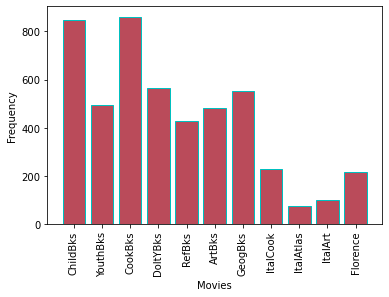

In [21]:
# Visualization of frequency

plt.bar (book.columns ,book.sum(axis=0), color = '#ba4b5a', edgecolor='c')
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [22]:
book_sales = apriori(book, min_support=0.005, max_len=2,use_colnames = True)
print("Original data",book_sales.head())

Original data    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


In [24]:
#Sorting in descending order (pov- Support)

book_sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value: \n",book_sales.head())


Sorted as per Support value: 
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (CookBks, ChildBks)


In [25]:
rules = association_rules(book_sales, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
102,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
68,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
69,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
87,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
...,...,...,...,...,...,...,...,...,...
59,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
74,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
75,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
60,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920


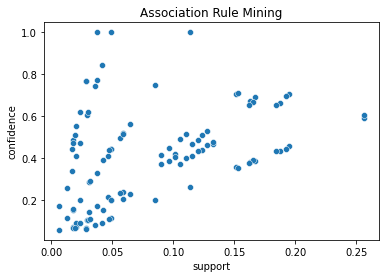

In [27]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


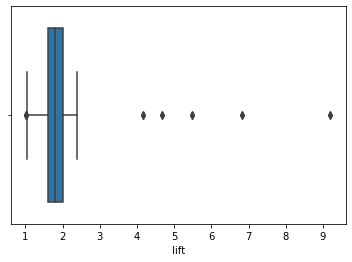

In [28]:
# Box plot 

sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

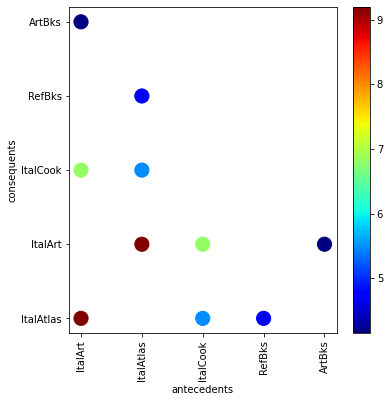

In [29]:
A1 = rules.antecedents.iloc[0:10]
B1 = rules.consequents.iloc[0:10]
C1 = rules.lift.iloc[0:10]

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 values
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

### With different values of support and confidence

In [31]:
#Association rule mining

Book_Sales = apriori(book, min_support=0.003, max_len=4,use_colnames = True)
print("Raw Data:\n",Book_Sales.head())

# Sort decending order based on support  
Book_Sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",Book_Sales.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (CookBks, ChildBks)


In [33]:
rules1 = association_rules(Book_Sales, metric="lift", min_threshold=2)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1732,"(RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
1733,"(ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
4172,"(RefBks, ItalArt)","(ItalAtlas, Florence)",0.0200,0.0065,0.0040,0.200000,30.769231,0.003870,1.241875
4173,"(ItalAtlas, Florence)","(RefBks, ItalArt)",0.0065,0.0200,0.0040,0.615385,30.769231,0.003870,2.548000
2696,"(RefBks, ItalArt)","(ItalAtlas, GeogBks)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
...,...,...,...,...,...,...,...,...,...
345,"(ArtBks, YouthBks, GeogBks)",(ChildBks),0.0650,0.4230,0.0550,0.846154,2.000364,0.027505,3.750500
3884,"(RefBks, ItalAtlas, Florence)",(ChildBks),0.0065,0.4230,0.0055,0.846154,2.000364,0.002750,3.750500
3895,(ChildBks),"(RefBks, ItalAtlas, Florence)",0.4230,0.0065,0.0055,0.013002,2.000364,0.002750,1.006588
3954,"(ItalAtlas, Florence)",(ChildBks),0.0065,0.4230,0.0055,0.846154,2.000364,0.002750,3.750500


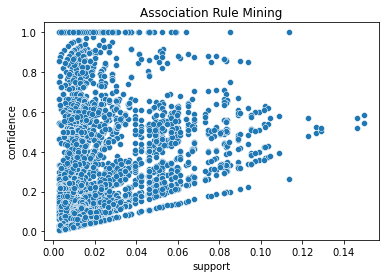

In [34]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule Mining")
plt.show()

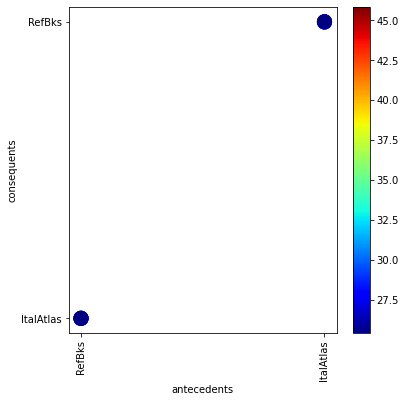

In [36]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]

# above code give frozen set error so change A & B:

X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()